In [129]:
import os
import numpy as np
import matplotlib.pyplot as plot
from pathlib import Path
import folium
from folium import plugins
import mapclassify
import geopandas as gpd
import pandas as pd
import glob 
import plotly.graph_objects as go
import fiona
from scipy.stats import spearmanr

In [3]:
#Get the current working directory
#os.chdir("..") Used only fto go down one directory
os.getcwd()

'/Users/josele/Library/CloudStorage/GoogleDrive-ejdvc757@gmail.com/Other computers/My MacBook Pro/PhD/HG_SWOT/Hypsometry/Hypsometry_project'

In [4]:
#List all the shapefiles in the directory and split them into nodes and reaches
shpNd = glob.glob('SWOT_L2_HR_RiverSP/**/*Node*.shp', recursive=True) #Nodes
shpRch = glob.glob('SWOT_L2_HR_RiverSP/**/*Reach*.shp', recursive=True) #Reaches
shpNd,shpRch

(['SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_010_022_NA_20240125T182836_20240125T182847_PIC0_01/SWOT_L2_HR_RiverSP_Node_010_022_NA_20240125T182836_20240125T182847_PIC0_01.shp',
  'SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_009_535_SA_20240123T054824_20240123T054826_PIC0_01/SWOT_L2_HR_RiverSP_Node_009_535_SA_20240123T054824_20240123T054826_PIC0_01.shp',
  'SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_007_022_NA_20231124T041320_20231124T041331_PIC0_01/SWOT_L2_HR_RiverSP_Node_007_022_NA_20231124T041320_20231124T041331_PIC0_01.shp',
  'SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_011_022_NA_20240215T151341_20240215T151352_PIC0_01/SWOT_L2_HR_RiverSP_Node_011_022_NA_20240215T151341_20240215T151352_PIC0_01.shp',
  'SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_010_535_SA_20240213T023329_20240213T023331_PIC0_01/SWOT_L2_HR_RiverSP_Node_010_535_SA_20240213T023329_20240213T023331_PIC0_01.shp',
  'SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_008_535_SA_20240102T090319_20240102T090321_PIC0_01/SWOT_L2_HR_Ri

In [5]:
shpNd_022_NA = glob.glob('SWOT_L2_HR_RiverSP/**/*Node*_022_NA*.shp', recursive=True) #Nodes
shpNd_022_NA

['SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_010_022_NA_20240125T182836_20240125T182847_PIC0_01/SWOT_L2_HR_RiverSP_Node_010_022_NA_20240125T182836_20240125T182847_PIC0_01.shp',
 'SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_007_022_NA_20231124T041320_20231124T041331_PIC0_01/SWOT_L2_HR_RiverSP_Node_007_022_NA_20231124T041320_20231124T041331_PIC0_01.shp',
 'SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_011_022_NA_20240215T151341_20240215T151352_PIC0_01/SWOT_L2_HR_RiverSP_Node_011_022_NA_20240215T151341_20240215T151352_PIC0_01.shp',
 'SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_009_022_NA_20240104T214331_20240104T214342_PIC0_01/SWOT_L2_HR_RiverSP_Node_009_022_NA_20240104T214331_20240104T214342_PIC0_01.shp',
 'SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_012_022_NA_20240307T115845_20240307T115856_PIC0_01/SWOT_L2_HR_RiverSP_Node_012_022_NA_20240307T115845_20240307T115856_PIC0_01.shp',
 'SWOT_L2_HR_RiverSP/SWOT_L2_HR_RiverSP_Node_008_022_NA_20231215T005824_20231215T005835_PIC0_01/SWOT_L2_HR_RiverSP_

In [6]:
geodataframes = []
for i in range(len(shpNd_022_NA)):
   geodataframes.append(gpd.read_file(shpNd_022_NA[i]))



In [7]:
subsetted_dataframes = []

# Loop over the list of dataframes
for dataframe in geodataframes:

    # Subset the dataframe to the desired columns and append to the list
    subsetted_dataframes.append(dataframe[['node_id', 'time_str','lat', 'lon', 'river_name', 'wse', 'width']])

In [179]:
result_df_list = []

# Number of rows in each dataframe (assuming they all have the same number of rows)
num_rows = len(subsetted_dataframes[0])

# Iterate over each row index
for i in range(num_rows):
    # Create a list to store data from each dataframe for the current row
    row_data = []
    # Iterate over each dataframe and extract the row data
    for df in subsetted_dataframes:
        row_data.append(df.iloc[i])
    # Concatenate the row data into a single dataframe and append it to the result list
    result_df_list.append(pd.concat(row_data, axis=1).T)
#result_df_list

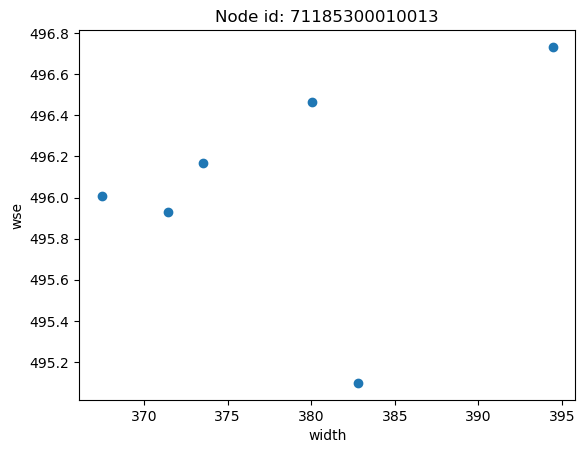

In [127]:
# Function to plot scatter plot from a given dataframe
def plot_scatter(dfa):
    plot.scatter(dfa['width'], dfa['wse'])
    plot.xlabel('width')
    plot.ylabel('wse')
    plot.title('Node id: ' + df['node_id'].iloc[0])
    plot.show()

# Select the index of the dataframe you want to plot
df_index = 28470
#34020---012_022_051F_20240307T120645_20240307T120706_PI---SWOT_L2_HR_Raster_250m_UTM14R_N_x_x_x_012_022_051F_20240307T120645_20240307T120706_PIC0_01.nc
#33978
#34041
# Plot scatter plot for the selected dataframe
plot_scatter(result_df_list[df_index])

In [153]:
result_df_list[28470]

,node_id,time_str,lat,lon,river_name,wse,width
28470,74297700220201,2024-01-25T18:31:39Z,46.943649,-100.906714,Missouri River,496.7328,394.443285
28470,74297700220201,2023-11-24T04:16:23Z,46.943902,-100.904425,Missouri River,495.93115,371.409429
28470,74297700220201,2024-02-15T15:16:44Z,46.943999,-100.904351,Missouri River,496.46655,380.065734
28470,74297700220201,2024-01-04T21:46:33Z,46.943684,-100.906148,Missouri River,496.00629,367.457369
28470,74297700220201,2024-03-07T12:01:48Z,46.944222,-100.904589,Missouri River,495.09815,382.792876
28470,74297700220201,2023-12-15T01:01:26Z,46.943666,-100.905881,Missouri River,496.16797,373.521882


In [180]:
for df in result_df_list:
    # Replace -999999999999.0 with NaN in the current dataframe
    df.replace(-999999999999.0, pd.NA, inplace=True)

In [182]:
result_df_list[28470]

,node_id,time_str,lat,lon,river_name,wse,width
28470,74297700220201,2024-01-25T18:31:39Z,46.943649,-100.906714,Missouri River,496.7328,394.443285
28470,74297700220201,2023-11-24T04:16:23Z,46.943902,-100.904425,Missouri River,495.93115,371.409429
28470,74297700220201,2024-02-15T15:16:44Z,46.943999,-100.904351,Missouri River,496.46655,380.065734
28470,74297700220201,2024-01-04T21:46:33Z,46.943684,-100.906148,Missouri River,496.00629,367.457369
28470,74297700220201,2024-03-07T12:01:48Z,46.944222,-100.904589,Missouri River,495.09815,382.792876
28470,74297700220201,2023-12-15T01:01:26Z,46.943666,-100.905881,Missouri River,496.16797,373.521882


In [212]:
columns_to_compare = [("width", "wse")]  # Add more pairs as needed

# List to store Spearman coefficients
spearman_coefficients = []

# Function to calculate Spearman coefficient for each pair of columns in a dataframe
def calculate_spearman(df, pair):
    col1, col2 = pair
    if col1 in df.columns and col2 in df.columns:
        na_mask = df[col1].notna() & df[col2].notna()  # Create mask to ignore NA values
        spearman_corr = df.loc[na_mask, [col1, col2]].corr(method='pearson').iloc[0, 1]
        spearman_coefficients.append((col1, col2, spearman_corr))

# Iterate over each dataframe in the list
for df in result_df_list:
    for pair in columns_to_compare:
        calculate_spearman(df, pair)






#rho, p = spearmanr(result_df_list['width'], result_df_list['wse'])

In [213]:
spearman_coefficients[28470]

('width', 'wse', 0.3013850520169945)

In [214]:
# Initialize count variable
count = 0

# Loop through the list and count values greater than or equal to 0.6
for value in spearman_coefficients:
    if value[2] >= 0.6:
        count += 1
print("Number of values equal to or greater than 0.6:", count)

Number of values equal to or greater than 0.6: 8385


In [207]:
count = sum(1 for x in spearman_coeffs if x >= 0.5)

TypeError: '>=' not supported between instances of 'list' and 'float'

In [149]:
spearman_coefficients


[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [ ]:
frames={}
for i in range(len(shpNd_022_NA)):
        frames[i] = pd.concat([gpd.read_file(shpNd_022_NA[i]).get('node_id'), gpd.read_file(shpNd_022_NA[i]).get('river_name'), gpd.read_file(shpNd_022_NA[i]).get('lat'), 
        gpd.read_file(shpNd_022_NA[i]).get('lon'), gpd.read_file(shpNd_022_NA[i]).get('wse'), gpd.read_file(shpNd_022_NA[i]).get('width')], axis=1)
   

In [ ]:
frames[1]

In [ ]:
first_rows = [frames.iloc[0] for frames in frames]

In [ ]:
#Read the shapefile. [0] is used to read the first shapefile in the list
gpd.read_file(shpNd[1]).head()

In [ ]:
m = gpd.read_file(shpNd[0]).explore('wse', cmap='viridis', legend=True)
m

In [ ]:
SWOT_HR_shp1 = gpd.read_file(shpNd[0])[['river_name','p_wse','p_width','geometry']]
SWOT_HR_shp1 =SWOT_HR_shp1.rename(columns={'river_name': 'River Name','p_wse':'Water Surface Elevation','p_width':'River Width'})
SWOT_HR_shp1.head()

In [ ]:
L = SWOT_HR_shp1
updated_m = L.explore(column='Water Surface Elevation', cmap='viridis', legend=True)

updated_m

In [ ]:
L.crs 

In [ ]:
files = glob.glob("**/*")
files

In [ ]:
shapes =   glob.glob(os.path.join('SWOT_L2_HR_RiverSP','*','*.shp'))
list_of_dfs = []
for f in shapes:
    df = gpd.read_file(f)
    list_of_dfs.append(df)

list_of_dfs[0]

In [ ]:
list_of_dfs[1]